In [ ]:
!pip install transformers
!pip install datasets[audio]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 97.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.1 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from transformers import pipeline
from datasets import load_dataset

In [ ]:
# Cargando el paquete de Colab para usar drive
from google.colab import drive

# Montar el colab en drive (Requiere autorización de Google Drive)
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ds_test = load_dataset("audiofolder", data_dir="/content/drive/MyDrive/Tesis/acordes_completo/test")

Resolving data files:   0%|          | 0/12960 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
pipe = pipeline(
    "audio-classification", model="alejogil35/distilhubert-finetuned-chorddetection2"
)

Some weights of the model checkpoint at alejogil35/distilhubert-finetuned-chorddetection2 were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at alejogil35/distilhubert-finetuned-chorddetection2 and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'hube

In [ ]:
predictions = []

In [ ]:
for i in range(12959, 12960):
  predictions.append(pipe(ds_test['train'][i]['audio']['array'])[0]['label'])

In [ ]:
predictions[450]

'DoDisminuida'

In [ ]:
lista_en_cadena = str(predictions)

In [ ]:
import json

# Supongamos que tienes una variable llamada "mi_variable" que deseas exportar
# mi_variable = {"nombre": "John", "edad": 30, "ciudad": "Ejemplo City"}

# # Convierte la variable a formato JSON y guárdala en un archivo
mi_variable_json = json.dumps(labelreal)

# Guarda la variable en un archivo de texto
with open('labelreal.json', 'w') as archivo:
    archivo.write(mi_variable_json)

In [ ]:
from google.colab import files

files.download('labelreal.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
with open('/content/drive/MyDrive/Tesis/dataproces/predictpipe.json', 'r') as archivo:
    datos_json = json.load(archivo)

In [ ]:
predictions = datos_json

In [ ]:
len(predictions)

12960

In [ ]:
predictions[12959]

'SolMenor'

In [ ]:
ds_test['train'][12959]

{'audio': {'path': '/content/drive/MyDrive/Tesis/acordes_completo/test/SolMenor/piano_4_Gn_n_p_99.wav',
  'array': array([0., 0., 0., ..., 0., 0., 0.]),
  'sampling_rate': 16000},
 'label': 47}

In [ ]:
import pandas as pd

df = pd.DataFrame(ds_train_prepoc)

In [ ]:
ds_test['train'][12900]['label']

47

In [ ]:
id2label_fn = ds_test["train"].features["label"].int2str
a = id2label_fn(ds_test["train"][0]["label"])
label2id_fn = ds_test["train"].features["label"].str2int
label2id_fn(a)

0

In [ ]:
label2id_fn('DoAumentada')

0

In [ ]:
predictionint = []

for i in range(0, 12960):
  predictionint.append(label2id_fn(predictions[i]))

In [ ]:
labelreal = []

In [ ]:
#12960
for i in range(0, 12960):
  labelreal.append(ds_test['train'][i]['label'])
  print(i)

In [ ]:
len(labelreal)

12960

Metricas

In [ ]:
from sklearn.metrics import precision_score

# Suponiendo que tienes y_true (verdaderas etiquetas) e y_pred (predicciones del modelo)
precision = precision_score(labelreal, predictionint, average='weighted')

In [ ]:
from sklearn.metrics import f1_score

# Suponiendo que tienes y_true (verdaderas etiquetas) e y_pred (predicciones del modelo)
f1 = f1_score(labelreal, predictionint, average='micro')

In [ ]:
from sklearn.metrics import accuracy_score
# Suponiendo que tienes y_true (verdaderas etiquetas) e y_pred (predicciones del modelo)
accuracy = accuracy_score(labelreal, predictionint)

In [ ]:
print(f"precision "+str(precision))
print(f"f1-score "+str(f1))
print(f"accuracy "+str(accuracy))

precision 1.0
f1-score 1.0
accuracy 1.0


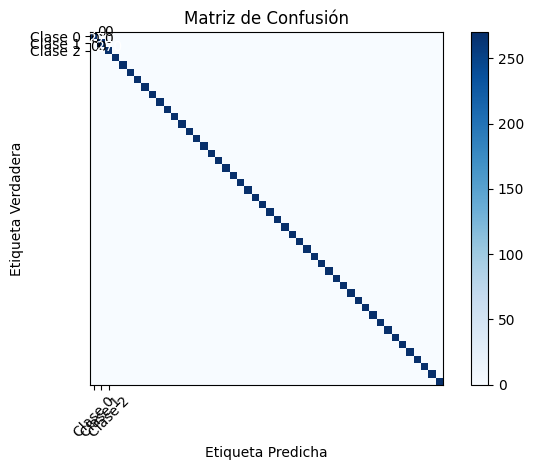

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que tienes las etiquetas reales (y_true) y las etiquetas predichas (y_pred)
y_true = labelreal
y_pred = predictionint

# Calcula la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Define las etiquetas de las clases (opcional)
clases = ["Clase 0", "Clase 1", "Clase 2"]

# Visualiza la matriz de confusión
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.colorbar()
tick_marks = np.arange(len(clases))
plt.xticks(tick_marks, clases, rotation=45)
plt.yticks(tick_marks, clases)

fmt = 'd'
thresh = cm.max() / 2.
for i in range(len(clases)):
    for j in range(len(clases)):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel("Etiqueta Verdadera")
plt.xlabel("Etiqueta Predicha")
plt.tight_layout()
plt.show()

In [ ]:
!pip install wandb



In [ ]:
import os
os.environ["WANDB_PROJECT"]="alejogil35/distilhubert-finetuned-chorddetection2"

In [ ]:
from transformers import TrainingArguments, Trainer

args = TrainingArguments(
    # other args and kwargs here
    report_to="wandb",  # enable logging to W&B
    run_name="bert-base-high-lr",  # name of the W&B run (optional)
    logging_steps=1  # how often to log to W&B
)

trainer = Trainer(
    # other args and kwargs here
    args=args,  # your training args
)

trainer.train()  # start training and logging to W&B